<a href="https://colab.research.google.com/github/shawk17/563-shawk17/blob/main/HW4_lattice_mc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#HW4
import numpy
directions = [numpy.array((1,0)),numpy.array((0,-1)),numpy.array((-1,0)),numpy.array((0,1))]
def pbc(site,L): #The convention here is to have positive lattice indices
  for i,s in enumerate(site):
    site[i] = s % L
  return site

class grid():
  def __init__(self,N=5,L=4,T=1.0):
    self.L = L
    self.N = N
    self.epsilon = -1
    self.kT = T
    self.particles = []
    for i in range(self.N):
      self.particles.append(particle())
      while True:
        rands = self.random_site()
        if not self.occupied(rands):
          self.particles[-1].location = rands
          break
    self.E = self.energy()

  def occupied(self,site):
    for p in self.particles:
      if numpy.array_equal(p.location,site):
        return True
    return False

  def random_site(self):
    return numpy.array((numpy.random.randint(self.L),numpy.random.randint(self.L)))

  def distance(self,site1,site2):
    return numpy.linalg.norm(site1-site2)

  def energy(self):
    energy = 0
    for p in self.particles:
      neighbors = p.get_neighbors(self.L)
      for n in neighbors:
        if self.occupied(n):
          energy += self.epsilon
    return energy/2

  def get_particle_energy(self,p):
    energy = 0
    neighbors = p.get_neighbors(self.L)
    for n in neighbors:
      if self.occupied(n):
        energy += self.epsilon
    return energy/2

  def __repr__(self):
    m = numpy.zeros((self.L, self.L))
    for p in self.particles:
      m[tuple(p.location)] = 1
    return str(m)

class particle():
  def __init__(self):
    self.location = numpy.array((-1,-1)) #negative index means unplaced

  def get_neighbors(self,L):
    neighbors = []
    for d in directions:
      neighbors.append( pbc(d+self.location, L))
    return neighbors

class simulation():
  def __init__(self,N=5,L=3,T=1.,steps = 1000,seed=2):
    numpy.random.seed(seed)
    self.grid = grid(N,L,T)
    self.accepted = 0
    self.rejected = 0
    self.energies = numpy.zeros(steps)
    for i in range(steps):
      self.trial_move()
      self.energies[i] = self.grid.E/N
      #if i%1000 == 0:
      #  print(i)
      #  print(self.grid.E)
      #  print(self.grid)

  def trial_move(self):
    p = numpy.random.choice(self.grid.particles)
    old = p.location
    #oldE = self.grid.E
    poldE = self.grid.get_particle_energy(p)
    trial = self.grid.random_site()
    if not self.grid.occupied(trial):
      p.location = trial
      #E = self.grid.energy()
      pE = self.grid.get_particle_energy(p)
      dE = pE - poldE
      if numpy.random.rand() < numpy.exp(-dE/self.grid.kT):
        self.grid.E += dE
        self.accepted += 1
        return
    p.location = old #need to reject moves that are overlaps
    #self.grid.E = oldE # Doesn't change
    self.rejected += 1


1. What is the average energy-per-particle for this system at a temperature of 1.0 energy units and a number density N/V=0.8?
  * -1.59 \pm 0.09 $\epsilon$

2. How precise is your measurement, and is there an N below which you lose confidence in your answer?
  * I am fairly confident to about 2 decimal places, going below L=5 seems to change the answer drarastically.

3. What is the average energy-per-particle at a temperature of 0.05?
  * -1.646 $\pm$ 0.017 $\epsilon$
  * I don't think they have quite reached equilibrium yet though.

4. For this problem you can modify the code to be faster, if you wish: What's the optimal system size for finding average energies?
  * I got the code to go significantly faster, I used that code for all the parts.
  * For me it seems for T = 1.0 a system size greater than 10 was the most stable while a system size less than 10 seemed to have more variance. Larger systems however, did take longer to run. If I get time I'll do an analysis of this below.
  * It looks like it doesn't quite scale linearly with the number of particles, but fairly close, exspecially for longer simulations.

5. What is the trial move acceptance rate at T=1.0 and T= 0.05?
  * At T = 1.0 the acceptance rate was about 0.16 and the rejection rate was about 0.84. With about a 0.01 variance. Once again answer change a lot below L = 4
  * At T = 0.05 the acceptance rate varied quite a bit, I think this is becuase the system has not yet reached equilibrium (if one did moves to any open spot it would reach equilibrium much faster).
    * Acceptance: 0.05-0.1
    * Rejection: 0.85-0.9

L=2,  N=3,  T=0.05
N/V = 0.75; <E> = -1.33, t = 0.755 s
Acceptance: 0.242;    Rejection: 0.758

L=3,  N=7,  T=0.05
N/V = 0.7777777777777778; <E> = -1.57, t = 0.688 s
Acceptance: 0.089;    Rejection: 0.911

L=4,  N=12,  T=0.05
N/V = 0.75; <E> = -1.53, t = 1.12 s
Acceptance: 0.016;    Rejection: 0.984

L=5,  N=20,  T=0.05
N/V = 0.8; <E> = -1.67, t = 1.29 s
Acceptance: 0.028;    Rejection: 0.972

L=10,  N=80,  T=0.05
N/V = 0.8; <E> = -1.64, t = 3.83 s
Acceptance: 0.053;    Rejection: 0.947

L=15,  N=180,  T=0.05
N/V = 0.8; <E> = -1.66, t = 3.75 s
Acceptance: 0.064;    Rejection: 0.936

L=20,  N=320,  T=0.05
N/V = 0.8; <E> = -1.62, t = 8.5 s
Acceptance: 0.092;    Rejection: 0.908

L=25,  N=500,  T=0.05
N/V = 0.8; <E> = -1.65, t = 11.9 s
Acceptance: 0.08;    Rejection: 0.92

The average energy per particle is: -1.646 +- 0.017480587205487338 E


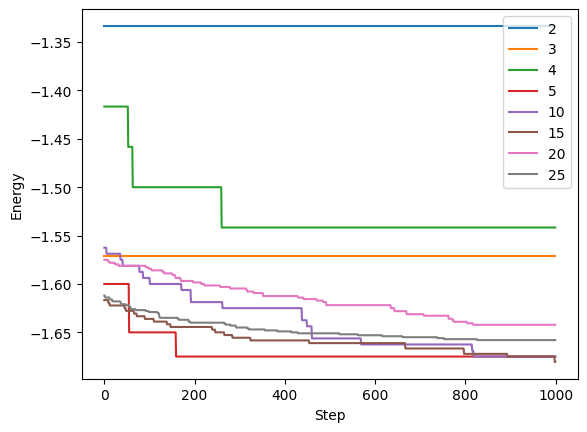

L=2,  N=3,  T=1
N/V = 0.75; <E> = -1.33, t = 0.16 s
Acceptance: 0.242;    Rejection: 0.758

L=3,  N=7,  T=1
N/V = 0.7777777777777778; <E> = -1.55, t = 0.187 s
Acceptance: 0.196;    Rejection: 0.804

L=4,  N=12,  T=1
N/V = 0.75; <E> = -1.45, t = 0.247 s
Acceptance: 0.167;    Rejection: 0.833

L=5,  N=20,  T=1
N/V = 0.8; <E> = -1.6, t = 0.329 s
Acceptance: 0.166;    Rejection: 0.834

L=10,  N=80,  T=1
N/V = 0.8; <E> = -1.58, t = 1.07 s
Acceptance: 0.163;    Rejection: 0.837

L=15,  N=180,  T=1
N/V = 0.8; <E> = -1.63, t = 2.52 s
Acceptance: 0.144;    Rejection: 0.856

L=20,  N=320,  T=1
N/V = 0.8; <E> = -1.6, t = 5.77 s
Acceptance: 0.166;    Rejection: 0.834

L=25,  N=500,  T=1
N/V = 0.8; <E> = -1.63, t = 7.98 s
Acceptance: 0.159;    Rejection: 0.841

The average energy per particle is: -1.585 +- 0.09044888569591775 E


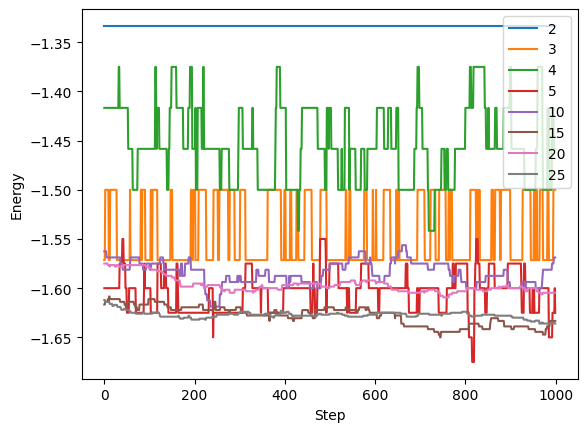

In [3]:
# 1 Average energy at kT 1 and N/V = 0.8
import matplotlib.pyplot as plt
import numpy as np
import time

L = np.array([2,3,4,5,10,15,20,25])
N = np.array(L**2*0.8, int)
ave_energy = []
steps = 1000
T = [0.05, 1]

for temp in T:
  for l, n in zip(L,N):
    print(f"L={l},  N={n},  T={temp}")
    t1 = time.perf_counter()
    s = simulation(N=n,L=l,T=temp,steps=steps, seed = 2)
    t2 = time.perf_counter()
    plt.plot(s.energies, label = l)
    ave_energy.append(np.mean(s.energies))
    print(f"N/V = {n/l**2}; <E> = {np.mean(s.energies):.3}, t = {t2-t1:.3} s")
    print(f"Acceptance: {s.accepted/steps};    Rejection: {s.rejected/steps}\n")


  print(f'The average energy per particle is: {np.mean(ave_energy[3:]):.3f} +- {np.std(ave_energy[3:])} E')
  plt.legend()
  plt.xlabel("Step")
  plt.ylabel("Energy")
  plt.show()


N= 5 seconds/100steps = 0.33348909500000445

N= 10 seconds/100steps = 0.6074297180000485

N= 50 seconds/100steps = 1.7833935420001126

N= 100 seconds/100steps = 2.9225516909998532

N= 200 seconds/100steps = 5.844504615999995

N= 400 seconds/100steps = 14.810169006000024

N= 500 seconds/100steps = 18.270886777999976

N= 1000 seconds/100steps = 41.55599049400007
Taking a minute for 200 steps. TOO SLOW


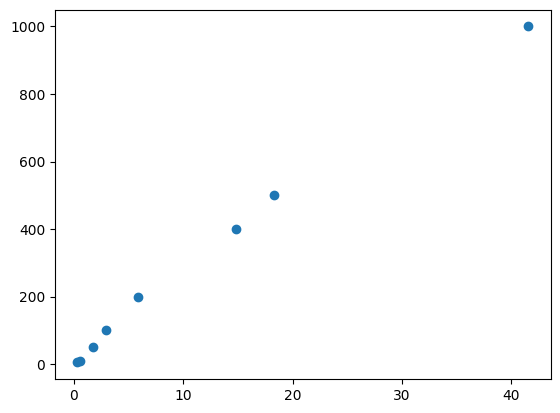

In [16]:
import time
times = []
Ns = [5,10,50,100,200,400,500,1000]
for N in Ns:
  t1 = time.perf_counter()
  s = simulation(N=N,L=100,T=0.5,steps=1000, seed = 2)
  t2 = time.perf_counter()
  print("\nN=",N,"seconds/100steps =", t2-t1)
  times.append(t2-t1)
  if t2-t1 > 30:
    print("Taking a minute for 200 steps. TOO SLOW")
    break
plt.scatter(times, Ns)
plt.show()

In [5]:
import matplotlib.pyplot as plt
energies = []
Ts =  [4,2,1,0.9,0.7, 0.5, 0.2]
for T in Ts:
  print("T=",T)
  s = simulation(N=20,L=7,T=T,steps=10000, seed = numpy.random.randint(100000))
  energies.append(s.energies)

T= 4
T= 2
T= 1
T= 0.9
T= 0.7
T= 0.5
T= 0.2


In [6]:
for T,e in zip(Ts,energies):
  print("T=",T, ", <E>=", numpy.array(e).mean())
#hard to say from the energy averages when N<10, but looking at the configurations
#maybe clustering starts to happen more around 0.7
#though the plots look qualitatively different at 0.5.

#rerunning with N=20, L=7, maxT=10000, looks like it'll take about 3 min.

T= 4 , <E>= -0.8094899999999999
T= 2 , <E>= -0.902415
T= 1 , <E>= -0.91219
T= 0.9 , <E>= -0.8160125000000001
T= 0.7 , <E>= -0.943335
T= 0.5 , <E>= -0.9356775000000002
T= 0.2 , <E>= -1.2490375000000002


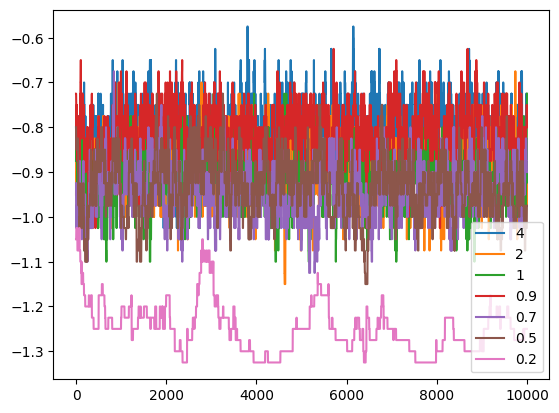

In [10]:
for T,e in zip(Ts,energies):
  plt.plot(e, label = T)
plt.legend()
plt.show()

# Yeah, 0.2 clusters up at the energy minimum, 0.5 touches it, and 0.7 starts clumping.